# Assignment 03
# Name : Dohyun Kwon
# Student ID : 2018120191
# github repository : https://github.com/hilariouss/assignment03.git

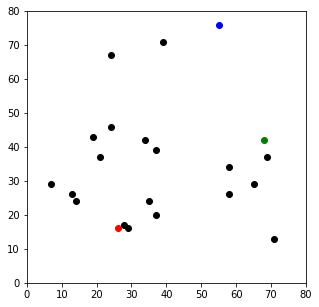

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Initialization
DataFrame = pd.DataFrame({
    'x': [7, 29, 37, 19, 24, 13, 34, 65, 21, 24, 58, 69, 35, 39, 58, 71, 14, 28, 37],
    'y': [29, 16, 20, 43, 67, 26, 42, 29, 37, 46, 26, 37, 24, 71, 34, 13, 24, 17, 39]
})

np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i + 1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
# plot initial centroid and other points
fig = plt.figure(figsize=(5, 5))
plt.scatter(DataFrame['x'], DataFrame['y'], color='k')
Color = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=Color[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# Initialize points and randomly create centroids among the given points.
# There are three centroids with color of red, blud, and green.
# Rest of the black points should be clustered with following steps.

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   7  29        23.021729        62.369865        67.178866        1     r
1  29  16         3.000000        46.872167        65.391131        1     r
2  37  20        11.704700        38.013156        58.821765        1     r
3  19  43        27.892651        49.010203        48.836462        1     r
4  24  67        51.039201        50.606324        32.280025        3     b


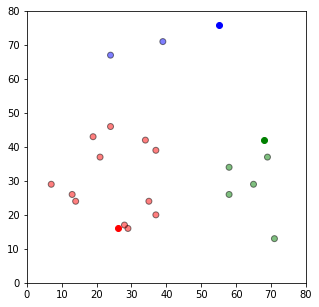

In [3]:
def assignLabel(DataFrame, centroids):
    for i in centroids.keys():
        DataFrame['distance_from_{}'.format(i)] = (
            np.sqrt(
                (DataFrame['x'] - centroids[i][0]) ** 2
                + (DataFrame['y'] - centroids[i][1]) ** 2
            )
        )
    distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    DataFrame['closest'] = DataFrame.loc[:, distance_cols].idxmin(axis=1)
    DataFrame['closest'] = DataFrame['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    DataFrame['color'] = DataFrame['closest'].map(lambda x: Color[x])
    return DataFrame

DataFrame = assignLabel(DataFrame, centroids)
print(DataFrame.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(DataFrame['x'], DataFrame['y'], color=DataFrame['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=Color[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# Assign label for each points in 'Dataframe' with respect to distance between each centroids

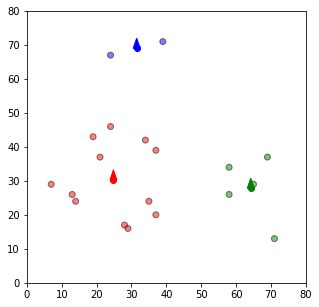

In [8]:
import copy

prev_centroid = copy.deepcopy(centroids)


def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(DataFrame[DataFrame['closest'] == i]['x'])
        centroids[i][1] = np.mean(DataFrame[DataFrame['closest'] == i]['y'])
    return k


centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(DataFrame['x'], DataFrame['y'], color=DataFrame['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=Color[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in prev_centroid.keys():
    prev_x = prev_centroid[i][0]
    prev_y = prev_centroid[i][1]
    dx = (centroids[i][0] - prev_centroid[i][0]) * 0.75
    dy = (centroids[i][1] - prev_centroid[i][1]) * 0.75
    ax.arrow(prev_x, prev_y, dx, dy, head_width=2, head_length=3, fc=Color[i], ec=Color[i])
plt.show()

# Update the previous centroid with the mean value of corresponding points
# The renewed centroids are marked with arrow

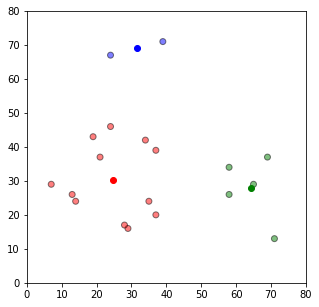

In [9]:
DataFrame = assignLabel(DataFrame, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(DataFrame['x'], DataFrame['y'], color=DataFrame['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=Color[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# Repeat the aforementioned label assignment procedures until no label change occurs

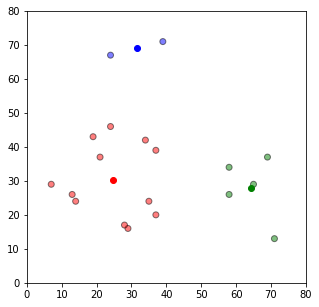

In [10]:
while True:
    closest_centroids = DataFrame['closest'].copy(deep=True)
    centroids = update(centroids)
    DataFrame = assignLabel(DataFrame, centroids)
    if closest_centroids.equals(DataFrame['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(DataFrame['x'], DataFrame['y'], color=DataFrame['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=Color[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

# Finally the clustering given points with k-means algorithm is done.